In [1]:
import os
import numpy as np
work_dir = os.path.abspath('../..')
print(work_dir)
os.chdir(work_dir)
from aiphy.dataplot import plot_data, ExpData
from aiphy.dataplot import plot_normaldata, NormalData
from aiphy.pca import pca_regression, is_conservation, calc_linear_combination, error_estimation_for_regression

/home/fyl/ai-physicist


In [2]:
def to_normaldata(data: np.ndarray, repeat_time: int = 100, error: float = 1e-8):
    assert len(data.shape) == 1
    xx = []
    for i in range(repeat_time):
        x = data + np.random.normal(0, error, len(data))
        xx.append(x.tolist())
    res = NormalData(xx)
    return res

In [3]:
t = np.linspace(0, 10, 100)
x = np.sin(t) - t * t
y = np.cos(t) + t

In [4]:
A = to_normaldata(x * y)
B = to_normaldata(x * x)
C = to_normaldata(y * y)
D = to_normaldata((x - y)**2)
E = to_normaldata((x + y)**2)
F = to_normaldata((x + y) * x)
G = to_normaldata(x * y - y ** 2)
# A = to_normaldata(x ** 3)
# B = to_normaldata((x - 2 * y)**3)
# C = to_normaldata(y ** 3)
# D = to_normaldata((x + y)**3)
# E = to_normaldata(x * y**2)
# F = to_normaldata(y * x**2)
# G = to_normaldata((x - 3*y)**3)

In [5]:
coes = pca_regression([D,G,C,A,E,F,B])
coes

[array([ 1,  0,  0,  0, -1,  4, -4], dtype=int32),
 array([ 0,  1,  0,  0,  1, -3,  2], dtype=int32),
 array([ 0,  0,  1,  0, -1,  2, -1], dtype=int32),
 array([ 0,  0,  0,  1,  0, -1,  1], dtype=int32)]

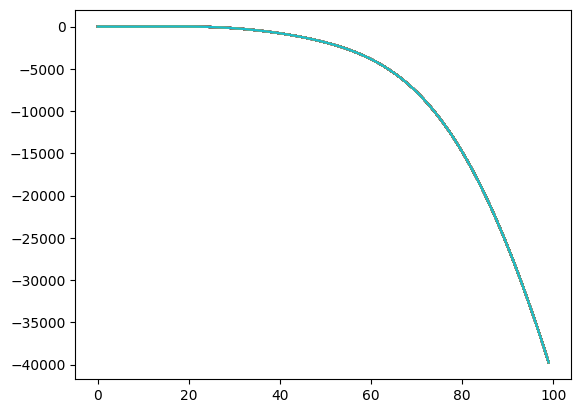

In [6]:
nd = D - A - C - F - F - F - E - E - E
plot_normaldata(nd)

In [7]:
nd.is_conserved

False

In [8]:
# coes = [-2.18217856e-01, -2.18218173e-01,  2.18217855e-01, -6.54653689e-01, -6.54653581e-01]
# coes = coes / min(abs(np.array(coes, dtype=np.float64)))
coes = [-1, -1, 1, -3, -3]
nd: NormalData = NormalData.from_elem(coes[0], 0, 100, 100) * A + \
    NormalData.from_elem(coes[1], 0, 100, 100) * C + \
    NormalData.from_elem(coes[2], 0, 100, 100) * D + \
    NormalData.from_elem(coes[3], 0, 100, 100) * E + \
    NormalData.from_elem(coes[4], 0, 100, 100) * F

In [9]:
coes

[-1, -1, 1, -3, -3]

In [10]:
print(nd.mean)

[-2.999999997951575, -4.83609101889422, -6.583382495950724, -8.074366037316057, -9.170498870881255, -9.765627021769301, -9.788812763013933, -9.20647259401005, -8.02374990040188, -6.2850688458653226, -4.073838385906014, -1.5113007554604772, 1.2454560678813311, 4.00627767321843, 6.551445629606828, 8.635812509127598, 9.993459493578372, 10.342750207384109, 9.39164174741776, 6.843105788114582, 2.400508508967035, -4.227201542650741, -13.320643096215738, -25.145625837519425, -39.9493712707576, -57.95743733035186, -79.37143361154193, -104.36759244093996, -133.0962379817675, -165.6821711069853, -202.2259645811269, -242.8061395382023, -287.4821728474004, -336.29826596892747, -389.2877883258102, -446.47829558240437, -507.8970123681784, -573.5766622705529, -643.561524958917, -717.9136006383275, -796.7187650810284, -880.0928052068613, -968.1872335560901, -1061.1947910169793, -1159.354558643412, -1262.9566124976184, -1372.3461682220147, -1487.927174532671, -1610.1653267392105, -1739.5904817639268, -

In [11]:
calc_linear_combination(coes, [np.array(A.mean, dtype=np.float64), np.array(C.mean, dtype=np.float64), np.array(D.mean, dtype=np.float64), np.array(E.mean, dtype=np.float64), np.array(F.mean, dtype=np.float64)])

array([-3.00000000e+00, -4.83609102e+00, -6.58338250e+00, -8.07436604e+00,
       -9.17049887e+00, -9.76562702e+00, -9.78881276e+00, -9.20647259e+00,
       -8.02374990e+00, -6.28506885e+00, -4.07383839e+00, -1.51130076e+00,
        1.24545607e+00,  4.00627767e+00,  6.55144563e+00,  8.63581251e+00,
        9.99345949e+00,  1.03427502e+01,  9.39164175e+00,  6.84310579e+00,
        2.40050851e+00, -4.22720154e+00, -1.33206431e+01, -2.51456258e+01,
       -3.99493713e+01, -5.79574373e+01, -7.93714336e+01, -1.04367592e+02,
       -1.33096238e+02, -1.65682171e+02, -2.02225965e+02, -2.42806140e+02,
       -2.87482173e+02, -3.36298266e+02, -3.89287788e+02, -4.46478296e+02,
       -5.07897012e+02, -5.73576662e+02, -6.43561525e+02, -7.17913601e+02,
       -7.96718765e+02, -8.80092805e+02, -9.68187234e+02, -1.06119479e+03,
       -1.15935456e+03, -1.26295661e+03, -1.37234617e+03, -1.48792717e+03,
       -1.61016533e+03, -1.73959048e+03, -1.87679846e+03, -2.02245227e+03,
       -2.17728263e+03, -

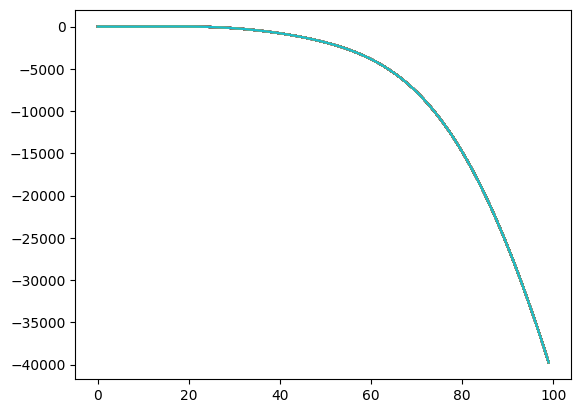

In [12]:
plot_normaldata(nd)

In [13]:
import numpy as np
coe = np.array([-2.18217892e-01, -2.18217879e-01,  2.18217892e-01, -6.54653670e-01,
  -6.54653674e-01], dtype=np.float64)
print(coe / np.abs(coe).min())
lst_means = [np.array(A.mean, dtype=np.float64),
              np.array(C.mean, dtype=np.float64),
              np.array(D.mean, dtype=np.float64),
              np.array(E.mean, dtype=np.float64),
              np.array(F.mean, dtype=np.float64)]
lst_errors = [np.array(A.std, dtype=np.float64),
                np.array(C.std, dtype=np.float64),
                np.array(D.std, dtype=np.float64),
                np.array(E.std, dtype=np.float64),
                np.array(F.std, dtype=np.float64)]
print(calc_linear_combination(coe, lst_means))
print(error_estimation_for_regression(coe, lst_errors))
is_conservation(calc_linear_combination(coe, lst_means),
                error_estimation_for_regression(coe, lst_errors))

[-1.00000006 -1.          1.00000006 -3.00000015 -3.00000017]
[-6.54653657e-01 -1.05532156e+00 -1.43661182e+00 -1.76197110e+00
 -2.00116689e+00 -2.13103450e+00 -2.13609404e+00 -2.00901700e+00
 -1.75092575e+00 -1.37151443e+00 -8.88984383e-01 -3.29792826e-01
  2.71780835e-01  8.74241503e-01  1.42964269e+00  1.88448883e+00
  2.18075170e+00  2.25697318e+00  2.04942430e+00  1.49328817e+00
  5.23833965e-01 -9.22450936e-01 -2.90680256e+00 -5.48722535e+00
 -8.71766744e+00 -1.26473496e+01 -1.73202667e+01 -2.27748757e+01
 -2.90439801e+01 -3.61548137e+01 -4.41293232e+01 -5.29846434e+01
 -6.27337531e+01 -7.33862979e+01 -8.49495597e+01 -9.74295515e+01
 -1.10832214e+02 -1.25164689e+02 -1.40436638e+02 -1.56661591e+02
 -1.73858288e+02 -1.92051995e+02 -2.11275775e+02 -2.31571688e+02
 -2.52991905e+02 -2.75599727e+02 -2.99470485e+02 -3.24692328e+02
 -3.51366880e+02 -3.79609764e+02 -4.09551001e+02 -4.41335266e+02
 -4.75122020e+02 -5.11085508e+02 -5.49414619e+02 -5.90312634e+02
 -6.33996832e+02 -6.80697978

False

In [14]:
import numpy as np
coe = np.array([-1.00000006, -1.,          1.00000006, -3.00000015, -3.00000017], dtype=np.float64)
lst_means = [np.array(A.mean, dtype=np.float64),
              np.array(C.mean, dtype=np.float64),
              np.array(D.mean, dtype=np.float64),
              np.array(E.mean, dtype=np.float64),
              np.array(F.mean, dtype=np.float64)]
lst_errors = [np.array(A.std, dtype=np.float64),
                np.array(C.std, dtype=np.float64),
                np.array(D.std, dtype=np.float64),
                np.array(E.std, dtype=np.float64),
                np.array(F.std, dtype=np.float64)]
print(calc_linear_combination(coe, lst_means))
print(error_estimation_for_regression(coe, lst_errors))
is_conservation(calc_linear_combination(coe, lst_means),
                error_estimation_for_regression(coe, lst_errors))

[-3.00000009e+00 -4.83609119e+00 -6.58338275e+00 -8.07436636e+00
 -9.17049924e+00 -9.76562741e+00 -9.78881314e+00 -9.20647294e+00
 -8.02375017e+00 -6.28506902e+00 -4.07383843e+00 -1.51130066e+00
  1.24545632e+00  4.00627807e+00  6.55144617e+00  8.63581317e+00
  9.99346024e+00  1.03427510e+01  9.39164249e+00  6.84310642e+00
  2.40050893e+00 -4.22720144e+00 -1.33206434e+01 -2.51456268e+01
 -3.99493729e+01 -5.79574399e+01 -7.93714372e+01 -1.04367597e+02
 -1.33096244e+02 -1.65682179e+02 -2.02225974e+02 -2.42806151e+02
 -2.87482187e+02 -3.36298282e+02 -3.89287807e+02 -4.46478317e+02
 -5.07897037e+02 -5.73576690e+02 -6.43561557e+02 -7.17913636e+02
 -7.96718804e+02 -8.80092848e+02 -9.68187281e+02 -1.06119484e+03
 -1.15935462e+03 -1.26295667e+03 -1.37234624e+03 -1.48792725e+03
 -1.61016541e+03 -1.73959057e+03 -1.87679856e+03 -2.02245237e+03
 -2.17728273e+03 -2.34208814e+03 -2.51773421e+03 -2.70515247e+03
 -2.90533862e+03 -3.11935017e+03 -3.34830348e+03 -3.59337029e+03
 -3.85577359e+03 -4.13678

False

In [15]:
import sympy as sp
import numpy as np

def rationalize_array(array, tolerance=0.1):
    # NOTE: To use this function, the normalization scheme must be 'first'?
    if np.all([isinstance(arr, np.ndarray) for arr in array]):
        return [rationalize_array(arr, tolerance) for arr in array]
    elif np.all([isinstance(arr, float) for arr in array]):
        # Devide the biggest element in the array
        array = array / max(np.abs(array))
        res = [sp.nsimplify(arr, rational=True, tolerance=tolerance, full=True) for arr in array]
        denominator_set = set([fraction.q for fraction in res])
        if len(denominator_set) == 1:
            common_denominator = list(denominator_set)[0]
        elif len(denominator_set) == 2:
            common_denominator = sp.lcm(*denominator_set)
        else:
            denominators = list(denominator_set)
            common_denominator = sp.lcm(denominators[0], denominators[1])
            for denominator in denominators[2:]:
                common_denominator = sp.lcm(common_denominator, denominator)
        res = [int(fraction * common_denominator) for fraction in res]
        return res
    else:
        raise ValueError("elements out of float can't be rationalized")

coes = [-1., 0., 1/2, 1/3, -3.]
print(coes)
rationalize_array(coes)

[-1.0, 0.0, 0.5, 0.3333333333333333, -3.0]


[-6, 0, 3, 2, -18]